['run3atmidf', 'run3at1.5f', 'run3atf', 'run3atstart']
[5.0, 2.500023535714011, 0.02169600184228717, 2.5002118134501856]
[ 5.00000004  2.48275123  0.02632604  2.51746874]
[8.4594965699125169e-07, 0.6908855593631178, 21.3405314364141, 0.69021864923352683]


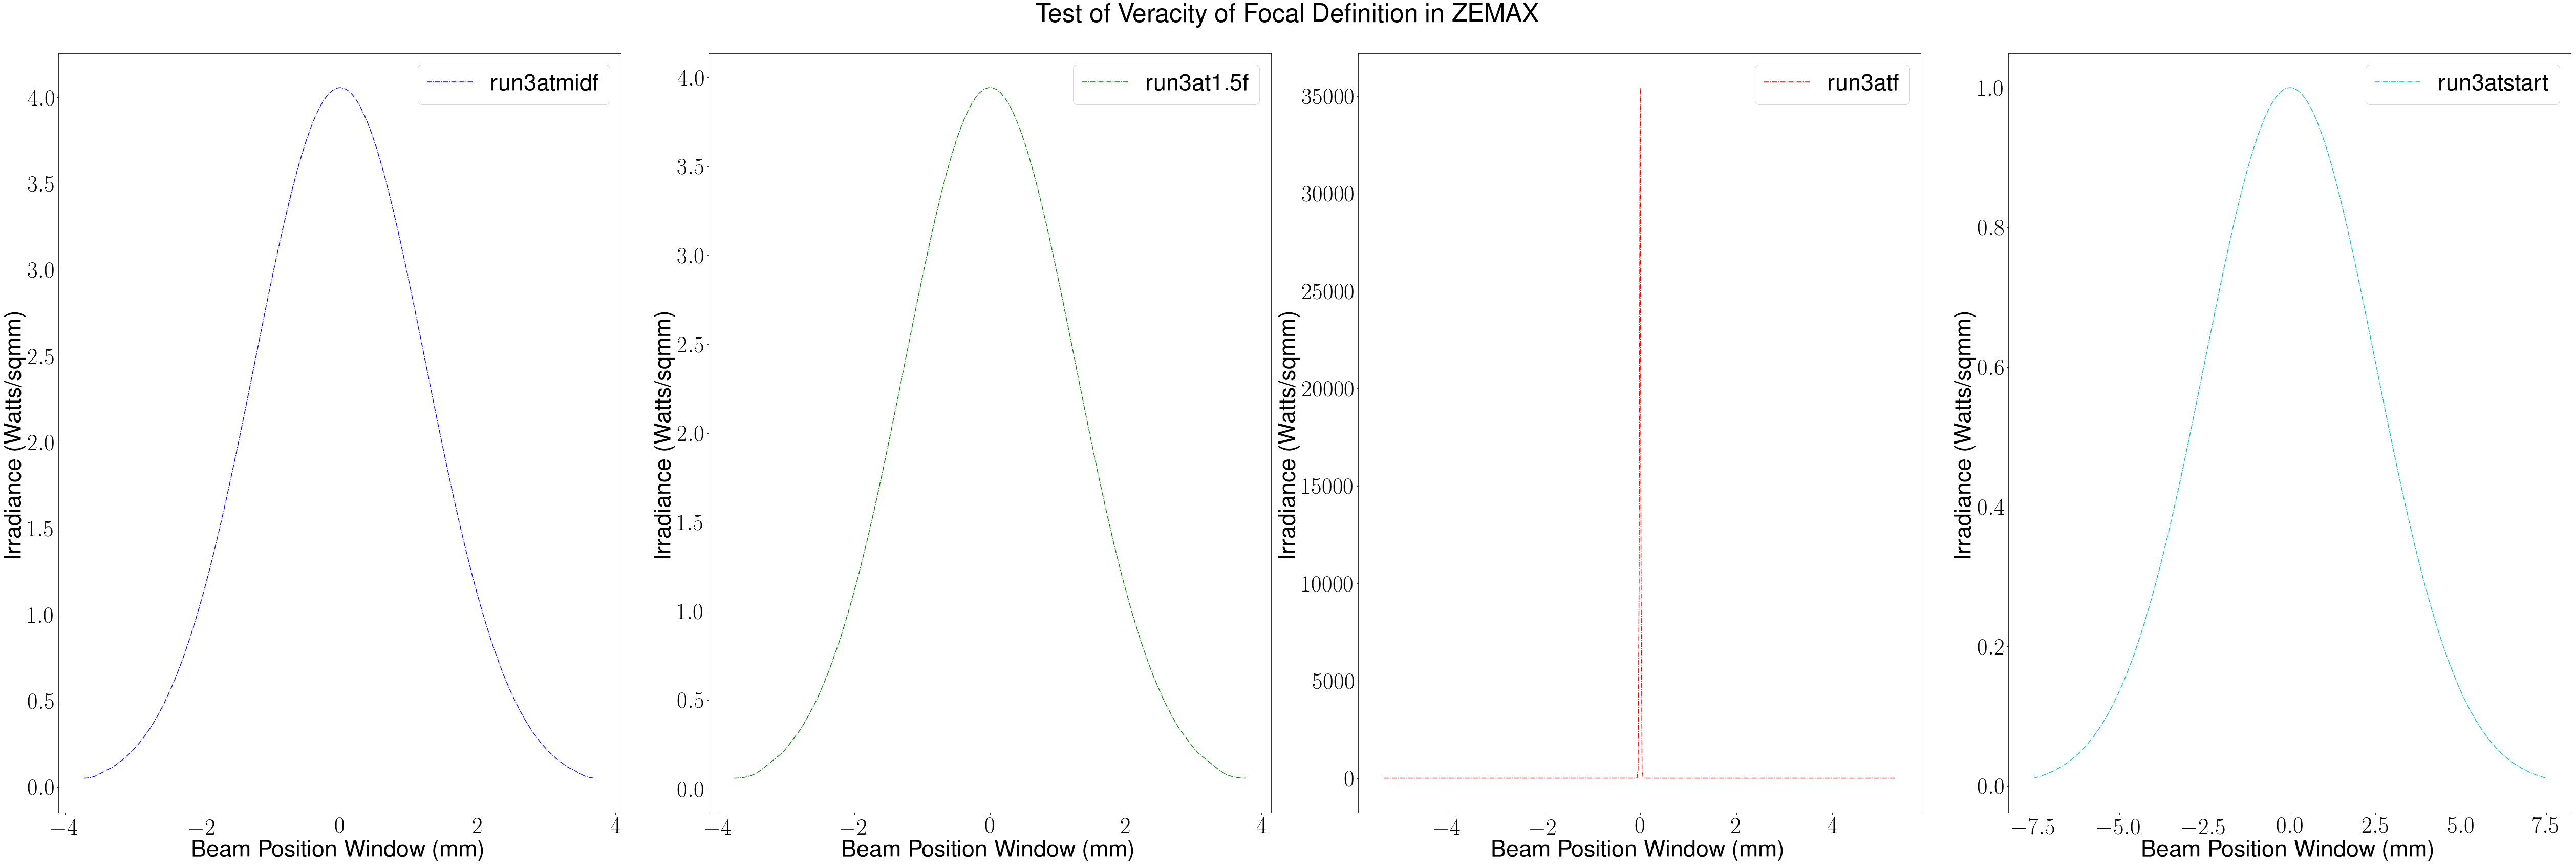

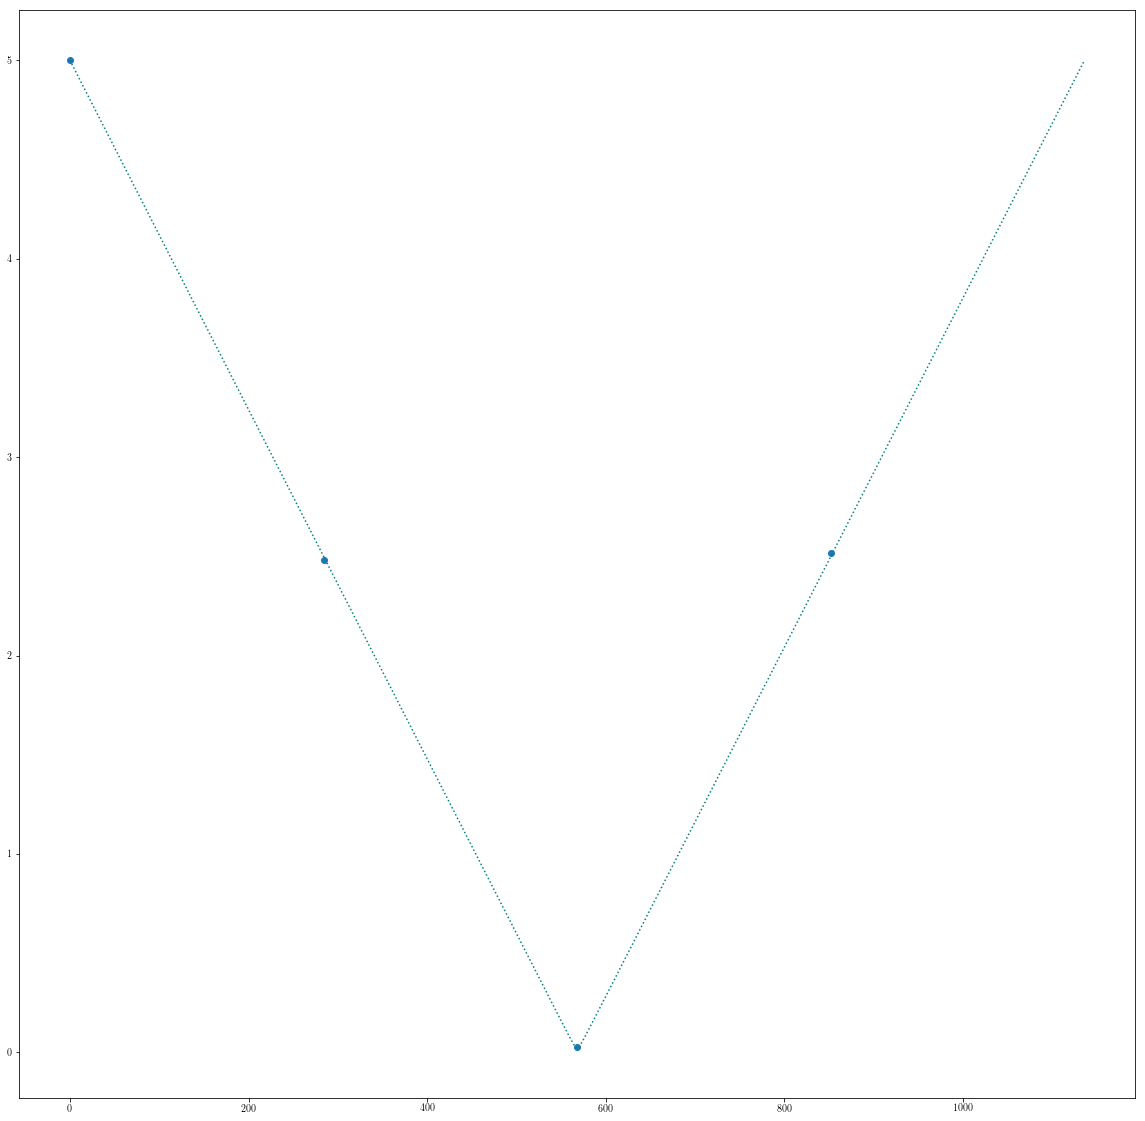

In [21]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'


def files_path_maker():
    curr_path_obj = Popen(["pwd"], stdout=PIPE, stderr=PIPE)
    c_dir = curr_path_obj.communicate()[0].decode('utf-8')
    ls_command = Popen(['ls'], stdout=PIPE, stderr=PIPE)
    files_names = str(ls_command.communicate()[0].decode('utf-8')).splitlines()
    f_names = []
    f_paths = []
    for i in files_names:
        if '.csv' in i:
            f_names.append(i.replace('.csv', ''))
            f_paths.append(c_dir.rstrip()+ '/'+i)
        f_names.reverse()
        f_paths.reverse()
    return(f_paths, f_names)

files = files_path_maker()

data_runs = data_generator(files[0])
print(files[1])
plot_generator(data_runs, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test of Veracity of Focal Definition in ZEMAX', files[1], 'doublecheck43')

#popt, pcov = curve_fit(gaussian, data_runs[1][0], data_runs[1][1], maxfev = 1800)

data = [data_runs[3], data_runs[0], data_runs[2], data_runs[1]]
sigmas = fit_parameter_extractor(gaussian, data)

fl = 568
step = np.divide(fl,2)
exp_waist = np.multiply(2, sigmas[2])
exp_x = np.arange(0, 2*fl, step)

a_x = np.arange(0,2*fl, 0.01)
a_w = lens_waist_size(a_x, 5,600,568)

s = plt.figure(figsize=(20,20))
s0 = s.add_subplot(111)
s0.scatter(exp_x, exp_waist)
s0.plot(a_x, a_w, linestyle = ':', color = 'teal')

expected_values = []
for i in exp_x:
    expected_values.append(lens_waist_size(i, 5, 600, 568))

expected_values
print(expected_values)
print(exp_waist)
pef = []

for i in range(len(expected_values)):
    pef.append(np.multiply(100,np.abs(np.divide(exp_waist[i]-expected_values[i], expected_values[i]))))
    
print(pef)